In [7]:
import pandas as pd

# reading file
df = pd.read_excel("Jumbo & Company_ Attach %.xlsx")
df.head(15)


,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17
5,Pune,Pune(Nagar Road) Br,0.46,0.35,0.17,0.11,0.21
6,Pune,Pune(Chinchwad) Br,0.29,0.31,0.30,0.17,0.26
7,Thane,Bhiwandi Br,0.44,0.44,0.33,0.21,0.39
8,Delhi_Ncr,Up (Noida Sec.18) Br,0.19,0.22,0.21,0.26,0.21
9,Pune,Pune(Baner) Br,0.26,0.25,0.29,0.19,0.19


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


In [9]:
month_cols = ["Aug", "Sep", "Oct", "Nov", "Dec"]

#coverting to non fraction  0.24 -> 24

df[month_cols] = (df[month_cols] * 100).round(2)

df[month_cols].head()


,Aug,Sep,Oct,Nov,Dec
0,24.0,25.0,16.0,17.0,23.0
1,4.0,28.0,15.0,26.0,21.0
2,43.0,41.0,30.0,36.0,25.0
3,32.0,13.0,36.0,33.0,33.0
4,17.0,21.0,14.0,11.0,19.0


In [10]:
# Removing extra spaces and standardize branch names
df["Branch"] = df["Branch"].str.strip().str.title()

# Cleaning store names
df["Store_Name"] = df["Store_Name"].str.strip()

df[["Branch", "Store_Name"]].head()


,Branch,Store_Name
0,Delhi_Ncr,Delhi(Janakpuri) Br
1,Delhi_Ncr,Haryana(Gurgaon) Br
2,Delhi_Ncr,Up(Greater Noida) Br
3,Pune,Pune(Bhosari) Br
4,Gujarat,Ahmedabad(Maninagar) Br


In [11]:
# to one column LONG format

df_long = pd.melt(
    df,
    id_vars=["Branch", "Store_Name"],     # Columns to keep fixed
    value_vars=month_cols,                
    var_name="Month",                     
    value_name="Attach_Percentage"        # New value column
)


df_long.head(10)


,Branch,Store_Name,Month,Attach_Percentage
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,24.0
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,4.0
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,43.0
3,Pune,Pune(Bhosari) Br,Aug,32.0
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,17.0
5,Pune,Pune(Nagar Road) Br,Aug,21.0
6,Pune,Pune(Chinchwad) Br,Aug,26.0
7,Thane,Bhiwandi Br,Aug,39.0
8,Delhi_Ncr,Up (Noida Sec.18) Br,Aug,21.0
9,Pune,Pune(Baner) Br,Aug,19.0


In [12]:
# Overall average attach %
overall_avg = df_long["Attach_Percentage"].mean()

# Overall variation across stores/months
overall_std = df_long["Attach_Percentage"].std()

overall_avg, overall_std


(np.float64(18.023312883435583), 13.974026320847672)

In [13]:
# average attach % for each month
monthly_avg = (
    df_long
    .groupby("Month")["Attach_Percentage"]
    .mean()
    .reset_index()
)

monthly_avg


,Month,Attach_Percentage
0,Aug,12.858896
1,Dec,21.723926
2,Nov,21.711656
3,Oct,17.092025
4,Sep,16.730061


In [14]:

# average attach % for each store
store_avg = (
    df_long
    .groupby(["Branch", "Store_Name"])["Attach_Percentage"]
    .mean()
    .reset_index()
)


# Renamed column for clarity
store_avg.rename(columns={"Attach_Percentage": "Avg_Attach_Percentage"}, inplace=True)

# stores from highest to lowest performance
store_avg = store_avg.sort_values("Avg_Attach_Percentage", ascending=False)

# ....top 10 stores
store_avg.head(10)


,Branch,Store_Name,Avg_Attach_Percentage
9,Delhi_Ncr,Delhi(Hauz Khas),62.2
92,Pune,Pune(Hadapsar),58.6
94,Pune,Pune(Kondhawa),41.4
3,Delhi_Ncr,Delhi(Budh Vihar),39.0
5,Delhi_Ncr,Delhi(Daryaganj),38.6
90,Pune,Pune(Dange Chowk),36.8
145,Thane,Bhiwandi Br,36.2
18,Delhi_Ncr,Delhi(Narela),35.8
35,Delhi_Ncr,Haryana(Mewla M.) Br,35.2
41,Delhi_Ncr,Up(Greater Noida) Br,35.0


In [15]:
# bottom 10 stores....

store_avg.tail(10)


,Branch,Store_Name,Avg_Attach_Percentage
110,Telangana,Ap(Vizag),3.4
159,Thane,Ulhasnagar Br,2.2
70,Mumbai,Boisar Br,2.0
80,Mumbai,MAHIM(VS Next),0.0
146,Thane,Currey Road,0.0
151,Thane,Kharghar Br,0.0
107,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.0
106,Telangana,Ap(Rajamundry),0.0
66,Gujarat,Vadodara(Kothi Road),0.0
104,Telangana,Ap(Ntr Circle),0.0


In [16]:
# standard deviation (for consistency check)

store_std = (
    df_long
    .groupby(["Branch", "Store_Name"])["Attach_Percentage"]
    .std()
    .reset_index()
)

store_std.rename(columns={"Attach_Percentage": "Std_Deviation"}, inplace=True)

# Merging average and consistency
store_perf = pd.merge(store_avg, store_std, on=["Branch", "Store_Name"])

store_perf.head(10)


,Branch,Store_Name,Avg_Attach_Percentage,Std_Deviation
0,Delhi_Ncr,Delhi(Hauz Khas),62.2,10.779610
1,Pune,Pune(Hadapsar),58.6,14.943226
2,Pune,Pune(Kondhawa),41.4,13.126309
3,Delhi_Ncr,Delhi(Budh Vihar),39.0,11.247222
4,Delhi_Ncr,Delhi(Daryaganj),38.6,8.384510
5,Pune,Pune(Dange Chowk),36.8,34.017642
6,Thane,Bhiwandi Br,36.2,9.628084
7,Delhi_Ncr,Delhi(Narela),35.8,27.068432
8,Delhi_Ncr,Haryana(Mewla M.) Br,35.2,13.405223
9,Delhi_Ncr,Up(Greater Noida) Br,35.0,7.516648


In [17]:
# Defining thresholds/limits for good and not good performing stores

high_threshold = overall_avg
low_threshold = overall_avg * 0.6

# to classify stores
def categorize(row):
    if row["Avg_Attach_Percentage"] >= high_threshold:
        return "Star Store"
    elif row["Avg_Attach_Percentage"] >= low_threshold:
        return "Average Store"
    else:
        return "Weak Store"

# Applying categorization
store_perf["Store_Category"] = store_perf.apply(categorize, axis=1)

store_perf["Store_Category"].value_counts()


Store_Category
Star Store       69
Average Store    60
Weak Store       34
Name: count, dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

month_map = {
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

# wide data to long format
df_long = pd.melt(
    df,
    id_vars=["Branch", "Store_Name"],
    value_vars=["Aug", "Sep", "Oct", "Nov", "Dec"],
    var_name="Month",
    value_name="Attach_Percentage"
)

# month to numbers
df_long["Month_Number"] = df_long["Month"].map(month_map)

df_long.head()


,Branch,Store_Name,Month,Attach_Percentage,Month_Number
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,24.0,8
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,4.0,8
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,43.0,8
3,Pune,Pune(Bhosari) Br,Aug,32.0,8
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,17.0,8


In [19]:

predictions = []

for (branch, store), data in df_long.groupby(["Branch", "Store_Name"]):
    
    # Independent variable (time)
    X = data["Month_Number"].values.reshape(-1, 1)
    
    # Dependent variable (attach %)
    y = data["Attach_Percentage"].values
    
    # linear regression model
    model = LinearRegression()
    
    # Training model
    model.fit(X, y)
    
    # Predicting for January
    jan_prediction = model.predict(np.array([[13]]))[0]
    
    # Avoiding negative predictions
    jan_prediction = max(0, jan_prediction)
    
    # result storing
    predictions.append([
        branch,
        store,
        round(jan_prediction, 2)
    ])

# Converting to DataFrame
jan_regression_pred = pd.DataFrame(
    predictions,
    columns=["Branch", "Store_Name", "Jan_Predicted_Attach_%"]
)

# Sorting from best to worst
jan_regression_pred = jan_regression_pred.sort_values(
    "Jan_Predicted_Attach_%", ascending=False
)

jan_regression_pred.head(10)


,Branch,Store_Name,Jan_Predicted_Attach_%
90,Pune,Pune(Dange Chowk),92.6
34,Delhi_Ncr,Haryana(M G Road) Br,85.5
113,Telangana,Ts(Bhel),71.0
18,Delhi_Ncr,Delhi(Narela),70.3
94,Pune,Pune(Kondhawa),61.2
85,Mumbai,Santacruz Br,60.6
9,Delhi_Ncr,Delhi(Hauz Khas),60.4
123,Telangana,Ts(Kondapur),60.2
35,Delhi_Ncr,Haryana(Mewla M.) Br,58.6
3,Delhi_Ncr,Delhi(Budh Vihar),55.2


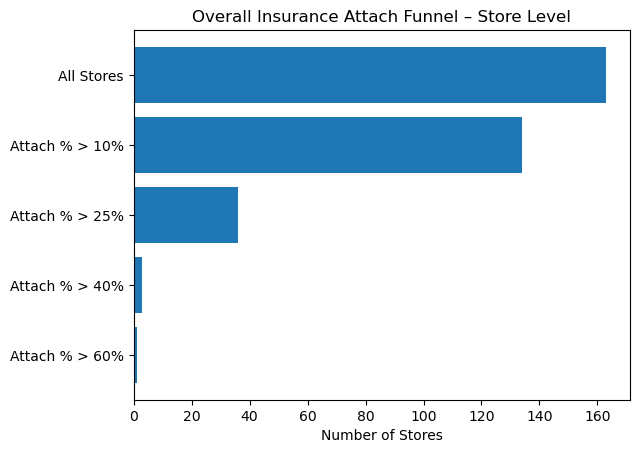

In [20]:
import matplotlib.pyplot as plt

store_avg_only = store_avg.copy()

# funnel stages
total_stores = len(store_avg_only)
above_10 = len(store_avg_only[store_avg_only["Avg_Attach_Percentage"] > 10])
above_25 = len(store_avg_only[store_avg_only["Avg_Attach_Percentage"] > 25])
above_40 = len(store_avg_only[store_avg_only["Avg_Attach_Percentage"] > 40])
above_60 = len(store_avg_only[store_avg_only["Avg_Attach_Percentage"] > 60])

# Funnel labels and values
funnel_labels = [
    "All Stores",
    "Attach % > 10%",
    "Attach % > 25%",
    "Attach % > 40%",
    "Attach % > 60%"
]

funnel_values = [
    total_stores,
    above_10,
    above_25,
    above_40,
    above_60
]

# funnel using horizontal bar chart
plt.figure()
plt.barh(funnel_labels, funnel_values)
plt.xlabel("Number of Stores")
plt.title("Overall Insurance Attach Funnel – Store Level")
plt.gca().invert_yaxis()
plt.show()


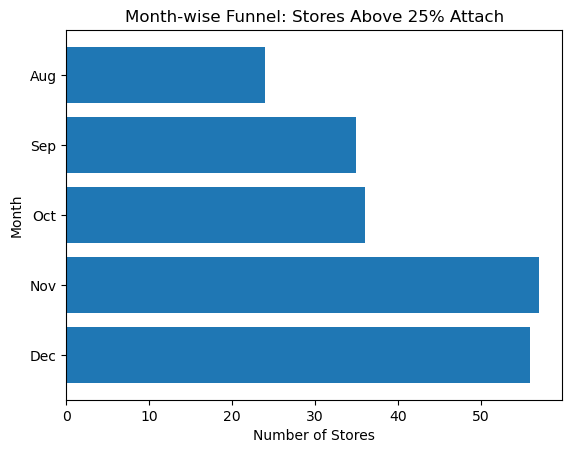

In [21]:
# month-wise store counts above threshold
threshold = 25  # good attach %

month_funnel = []

for month in ["Aug", "Sep", "Oct", "Nov", "Dec"]:
    count = (df[month] > threshold).sum()
    month_funnel.append(count)

# plotting of funnel.........


plt.figure()
plt.barh(["Aug", "Sep", "Oct", "Nov", "Dec"], month_funnel)
plt.xlabel("Number of Stores")
plt.ylabel("Month")
plt.title("Month-wise Funnel: Stores Above 25% Attach")
plt.gca().invert_yaxis()
plt.show()


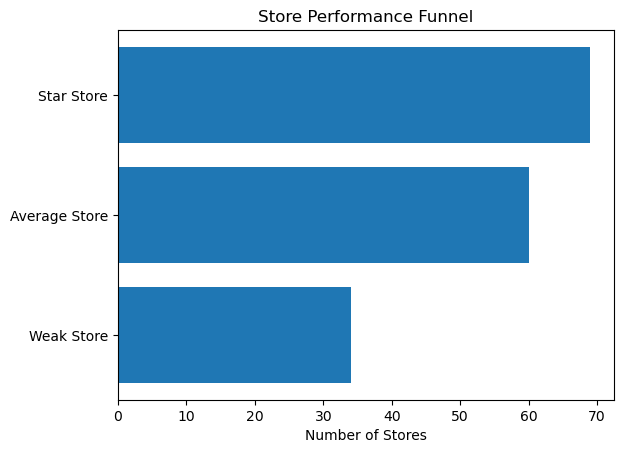

In [22]:
# Count of stores per category
category_counts = store_perf["Store_Category"].value_counts()

# Arranged in funnel order

funnel_categories = [
    "Star Store",
    "Average Store",
    "Weak Store"
]

funnel_cat_values = [
    category_counts.get("Star Store", 0),
    category_counts.get("Average Store", 0),
    category_counts.get("Weak Store", 0)
]

plt.figure()
plt.barh(funnel_categories, funnel_cat_values)
plt.xlabel("Number of Stores")
plt.title("Store Performance Funnel")
plt.gca().invert_yaxis()
plt.show()


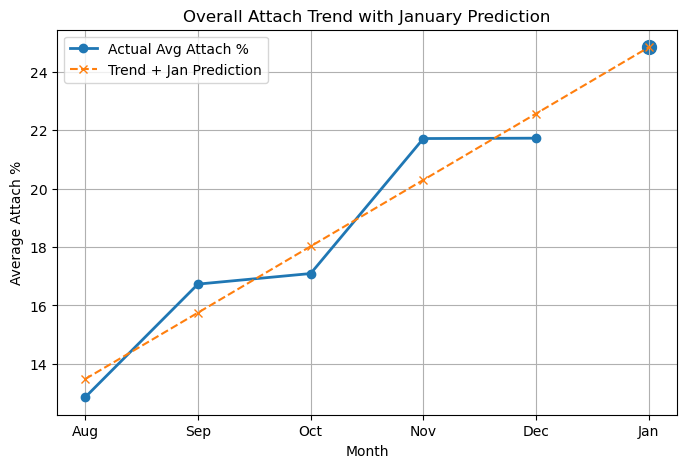

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Monthly averages
monthly_avg_df = pd.DataFrame({
    "Month": ["Aug", "Sep", "Oct", "Nov", "Dec"],
    "Attach_Percentage": df[["Aug", "Sep", "Oct", "Nov", "Dec"]].mean().values,
    "Month_Num": [1, 2, 3, 4, 5]
})

# Regression
X = monthly_avg_df[["Month_Num"]]
y = monthly_avg_df["Attach_Percentage"]

model = LinearRegression()
model.fit(X, y)

# Predictions
future_df = pd.DataFrame({"Month_Num": [1, 2, 3, 4, 5, 6]})
predicted = model.predict(future_df)

# Plot
plt.figure(figsize=(8, 5))

plt.plot(
    monthly_avg_df["Month"],
    monthly_avg_df["Attach_Percentage"],
    marker="o",
    linewidth=2,
    label="Actual Avg Attach %"
)

plt.plot(
    ["Aug", "Sep", "Oct", "Nov", "Dec", "Jan"],
    predicted,
    linestyle="--",
    marker="x",
    label="Trend + Jan Prediction"
)

plt.scatter("Jan", predicted[-1], s=100)

plt.xlabel("Month")
plt.ylabel("Average Attach %")
plt.title("Overall Attach Trend with January Prediction")
plt.legend()
plt.grid(True)
plt.show()


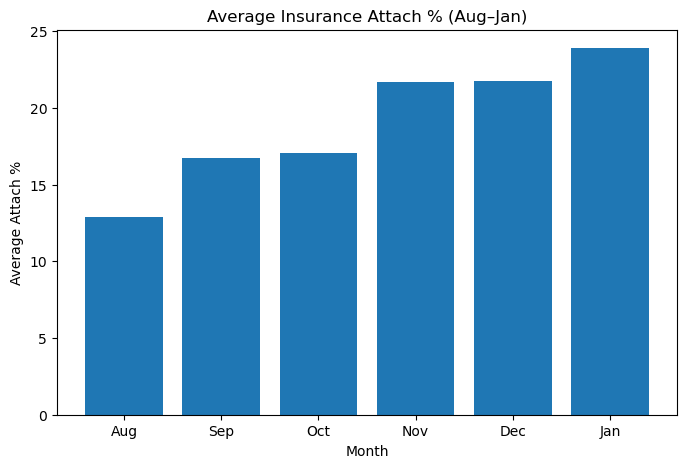

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

# monthly averages
monthly_avg = df[["Aug", "Sep", "Oct", "Nov", "Dec"]].mean()

# to DataFrame for plotting
monthly_df = monthly_avg.reset_index()
monthly_df.columns = ["Month", "Attach_Percentage"]

# Add January value 
jan_df = pd.DataFrame({
    "Month": ["Jan"],
    "Attach_Percentage": [jan_prediction]
})

#  Aug–Dec + Jan
final_df = pd.concat([monthly_df, jan_df], ignore_index=True)


# bar chart

plt.figure(figsize=(8, 5))

plt.bar(
    final_df["Month"],
    final_df["Attach_Percentage"]
)

plt.xlabel("Month")
plt.ylabel("Average Attach %")
plt.title("Average Insurance Attach % (Aug–Jan)")
plt.show()
